In [38]:
pip install pyextremes

In [39]:
from pyextremes import EVA
import numpy as np
import pandas as pd

In [40]:
from google.colab import files
uploaded=files.upload()

Saving data1.csv to data1 (1).csv


In [60]:
tHs=pd.read_csv("data1.csv",index_col=0,parse_dates=True,header=None)
tHs = tHs.rename(columns={1: 'Rainfall'}).squeeze()
new_index_name = 'dates (year)'  # Replace with your desired name
tHs.index.name = new_index_name
print(tHs)

dates (year)
1983-07-16    16.56
1983-07-17     4.53
1983-07-18    13.71
1983-07-19    15.67
1983-07-20    30.90
              ...  
2023-07-12    14.13
2023-07-13    12.87
2023-07-14    13.19
2023-07-15     8.38
2023-07-16    11.57
Name: Rainfall, Length: 14574, dtype: float64


In [61]:
modelHs=EVA(tHs)

(<Figure size 768x480 with 1 Axes>,
 <Axes: xlabel='dates (year)', ylabel='Rainfall'>)

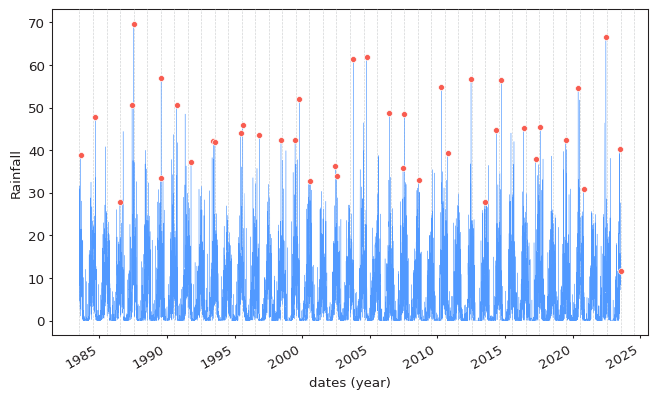

In [62]:
modelHs.get_extremes(method="BM",block_size="365.24D")
modelHs.plot_extremes()

In [63]:
modelHs.fit_model()
summary = modelHs.get_summary(
    return_period=[1,2,5,10,25,50,100,200,500,800,1600],
    alpha=0.95,
    n_samples = 1000
)

(<Figure size 768x768 with 4 Axes>,
 (<Axes: title={'center': 'Return value plot'}, xlabel='Return period', ylabel='Rainfall'>,
  <Axes: title={'center': 'Probability density plot'}, xlabel='Rainfall', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

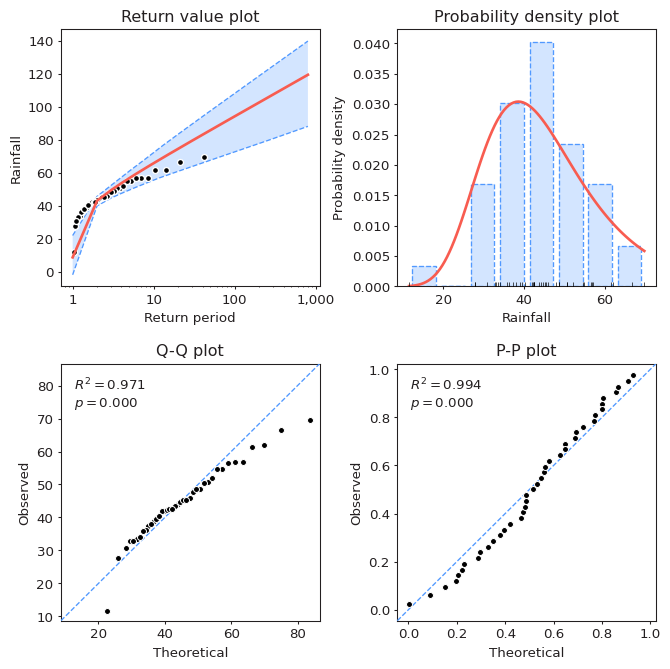

In [64]:
number_of_return_years=800
modelHs.plot_diagnostic(alpha=0.95, return_period=range(1,number_of_return_years))

In [65]:
print(summary)

               return value   lower ci    upper ci
return period                                     
1.0                8.621647  -0.915353   22.676995
2.0               42.999052  39.476704   45.947123
5.0               56.707302  49.624289   60.851883
10.0              65.783369  55.163894   71.670468
25.0              77.251007  61.856542   85.516093
50.0              85.758357  67.003034   95.894238
100.0             94.202891  72.082845  106.465137
200.0            102.616612  77.257817  117.041772
500.0            113.716920  83.933739  130.811192
800.0            119.405939  87.194455  137.750338
1600.0           127.793016  92.097151  147.987558
